In [1]:
#To ignore the displayed warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Panda Library is used to Load data into a dataframe from the Excel File
import pandas as pd
features = pd.read_excel('D:\\SLIIT\\4th Year\\ML\\Assignment\\default of credit card clients Data Set\\default of credit card clients.xls')

#Display first 5 rows of the loaded dataset
features.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
#Display the Count of each target label and it's proportion
label_count = features.Y.value_counts()
print('Not Default:', label_count[0])
print('Default:', label_count[1])
print('Proportion:', round(label_count[0] / label_count[1], 2), ': 1')

Not Default: 23364
Default: 6636
Proportion: 3.52 : 1


In [4]:
#Random undersampling to remove samples from majority class and equate the proporion of target labels

# count classes
count_class_0, count_class_1 = features.Y.value_counts()

# Divide by class and random undersampling
df_class_0 = features[features['Y'] == 0]
df_class_1 = features[features['Y'] == 1]

df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random Under Sampling')
print(df_test_under.Y.value_counts())

df_test_under.Y.value_counts().plot(kind='bar', title='Count (target)');

Random Under Sampling
1    6636
0    6636
Name: Y, dtype: int64


In [5]:
#Defining the feature sets into x variable and the series of corresponding labels into the y variable
y = df_test_under['Y']
x = df_test_under.drop(columns = ['Y'])

In [6]:
#Splitting the datset into training set and test set
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)  

In [7]:
#Standard scalar normalization to normalize the feature set
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test) 

In [8]:
#Selection of Pricincipal Components while maintaining 95% of variance
from sklearn.decomposition import PCA
principalComponents = PCA(0.95)
x_train = principalComponents.fit_transform(x_train)  
x_test = principalComponents.transform(x_test)

In [9]:
# Adding the count of features into a data frame
pcaDataFrame = pd.DataFrame(data=x_train)

# Concatatanating the result column
finalDataFrame = pd.concat([pcaDataFrame, features[['Y']]], axis = 1)

# Displaying the first 5 rows of the final frame
finalDataFrame.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Y
0,0.084583,-2.699271,0.039887,1.785890,0.382083,-0.837246,-0.254564,-0.040919,0.136590,1.320471,0.059725,0.505168,0.614860,-0.586550,0.591219,NaN
1,1.889727,1.176584,0.381064,-0.145360,-1.969020,-0.576414,3.122638,-3.443804,-0.595978,-0.392541,0.065943,0.847465,0.366638,-0.736304,0.009134,1.0
2,-0.524572,-2.613512,0.563797,0.463132,-1.029888,0.771295,0.136516,0.118770,-0.430866,-1.127988,-0.135144,0.367864,0.777702,-0.676566,0.772147,1.0
3,0.220766,-1.424168,0.637464,0.634947,1.723326,0.063849,0.278043,-0.181145,-0.274635,0.196067,-0.688099,0.592709,-1.190151,0.589002,-1.483270,0.0
4,0.707151,0.413828,0.468762,0.761693,0.892127,-0.298009,-0.658817,-0.293293,-0.127759,0.280139,-1.178371,-1.614247,-0.401185,-0.510774,0.191580,0.0


In [10]:
#Importing the Classifier for training and making predictions
from sklearn.neural_network import MLPClassifier  

classifier = MLPClassifier(hidden_layer_sizes=(50,50,50,50),activation ='logistic', max_iter=3000)  
classifier.fit(x_train, y_train.values.ravel())  
predictions = classifier.predict(x_test)  

In [11]:
#Classification Report for Perfomance Evaluation
from sklearn import metrics
print("Classification Report for Perfomance Evaluation of ANN \n\n",metrics.classification_report(predictions, y_test, target_names = ["Default","Not Default"]))

Classification Report for Perfomance Evaluation of ANN 

               precision    recall  f1-score   support

     Default       0.78      0.66      0.71      1569
 Not Default       0.60      0.73      0.66      1086

   micro avg       0.69      0.69      0.69      2655
   macro avg       0.69      0.70      0.69      2655
weighted avg       0.71      0.69      0.69      2655



AUC: 74.800


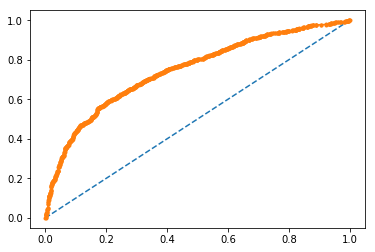

In [12]:
#Plotting the ROC curve for perfomcnace Evaluation

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# predict probabilities
probability = classifier.predict_proba(x_test)

# keep probabilities for the positive outcome only
probability = probability[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probability)
print('AUC: %.3f' % (auc*100.0))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probability)

# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve 
pyplot.plot(fpr, tpr, marker='.')

# display plot
pyplot.show()

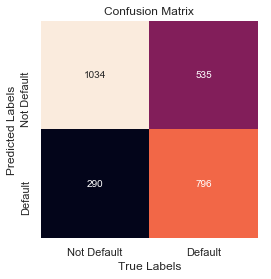

In [13]:
#Print the confusion matrix based on the test values
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

get_ipython().run_line_magic('matplotlib', 'inline')
mat = confusion_matrix(y_test, predictions)
subGraph= plt.subplot()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,ax=subGraph)
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels');

# Defining the titles
subGraph.set_title('Confusion Matrix');

# Defining the class labels for axis
subGraph.xaxis.set_ticklabels(['Not Default', 'Default']);
subGraph.yaxis.set_ticklabels(['Not Default','Default']);

In [14]:
# Calculating the cross validation score of the dataset 
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier, x, y,cv=5)
print("Cross validation Average Accuracy: " + str(scores.mean()*100.0) )

Cross validation Average Accuracy: 56.977510645445385
